<a href="https://colab.research.google.com/github/kboustany/deepforward/blob/main/examples/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Fashion-MNIST dataset.

We first import the dataset and a one-hot encoding utility from TensorFlow.

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

We then import the DeepForward library from our GitHub repository.

In [ ]:
!git clone https://github.com/kboustany/deepforward.git

From the library we import the primary model class, together with the layers
and optimizers needed to build and train a model.

In [ ]:
from deepforward.model import Model
from deepforward.layers import *
from deepforward.optimizers import *

We split off training and testing sets, scale down the grayscale values, reshape the data, and encode the labels into one-hot vectors.

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255., X_test / 255.
X_train, X_test = X_train.reshape((60000, 784)), X_test.reshape((10000, 784))
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

The model below is a deep network with two hidden layers, using the ReLU activation function and a softmax output layer.

We preprocess the full training set to extract a genuine training set and a
validation set (10% of the data by default).

We configure the model for a classification task, which specifies cross entropy
as the training loss and accuracy as a performance metric.

We choose an Adam optimizer with a constant learning rate of 0.01.

In [ ]:
model = Model([Input(784),
               Dense(300, 'relu'),
               Dense(100, 'relu'),
               Dense(10, 'softmax')]
              )

train_set, valid_set = model.preprocess(X_train, Y_train)

model.configure(task='classification', optimizer=Adam(0.01))

We then train the model for 10 epochs, with a (default) batch size of 32.

Final training loss: 0.1879      Final validation loss: 0.2965
Final training metric: 0.9318    Final validation metric: 0.8950


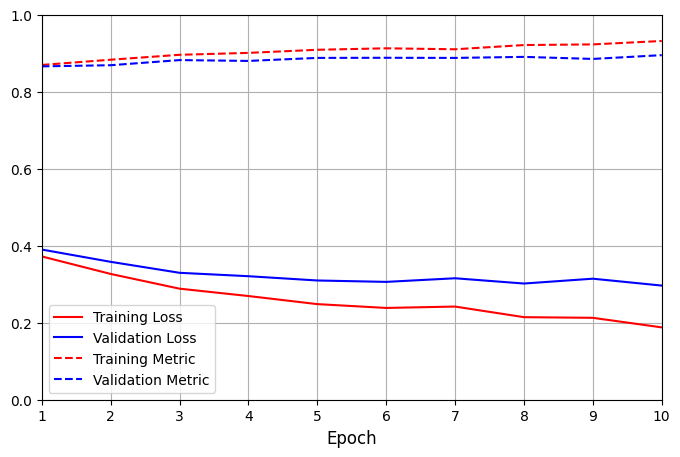

Test loss: 0.3154    Test metric: 0.8920


In [ ]:
model.train(train_set, valid_set, epochs=10)
model.evaluate(X_test, Y_test)

We see that the model performace is pretty good, with an 89% accuracy on the test set. By contrast, a basic convolutional model (which is more appropriate for image classification tasks) yields an accuracy of about 92%.

Next, we try training the same model but with some dropout, adding a 0.5 dropout rate for each dense hidden layer.

In [ ]:
model2 = Model([Input(784),
                Dropout(300, 'relu', drop=0.5),
                Dropout(100, 'relu', drop=0.5),
                Dense(10, 'softmax')]
               )

train_set, valid_set = model2.preprocess(X_train, Y_train)

model2.configure(task='classification', optimizer=Adam(0.01))

Final training loss: 0.3053      Final validation loss: 0.3417
Final training metric: 0.8872    Final validation metric: 0.8780


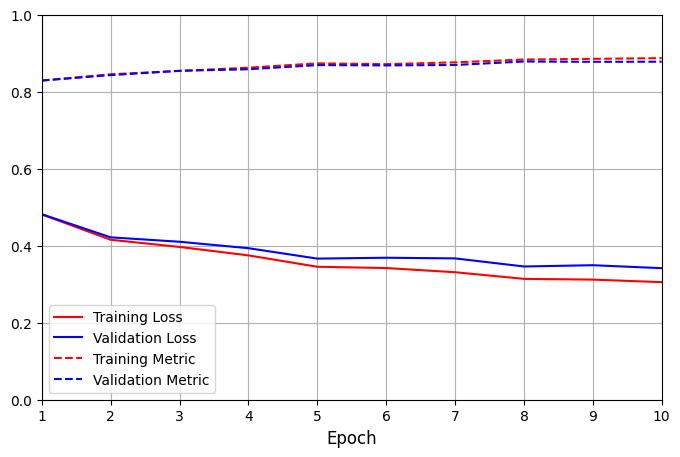

Test loss: 0.3665    Test metric: 0.8689


In [ ]:
model2.train(train_set, valid_set, epochs=10)
model2.evaluate(X_test, Y_test)

Although this model ended up performing worst than the previous one, the graphical summary above does show that dropout is indeed mitigating some overfitting, as the red and blue curves are much closer to each other over the various epochs.